# Cerebral Stroke Prediction

## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#cstroke is a shortname of cerebral stroke
cstroke = pd.read_csv("dataset.csv")

In [3]:
# This is will display top 5 rows from the dataset
cstroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


## Data Cleaning and Data Preprocessing

In [4]:
#To see information of columns
cstroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [5]:
# Value counts will give unnique values of each attribute
cstroke['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [6]:
# Here we are mapping smoking status features with 012 which can get numerical columns used for prediction
cstroke['smoking_status_num'] = cstroke['smoking_status'].map({'never smoked':0,'formerly smoked':1,'smokes':2})
cstroke['smoking_status_num'] = cstroke['smoking_status_num'].fillna(cstroke['smoking_status_num'].mean()).round()

In [7]:
#Checking for null values
cstroke.isnull().sum()

id                        0
gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
bmi                    1462
smoking_status        13292
stroke                    0
smoking_status_num        0
dtype: int64

In [8]:
# We are dropping columns which are not much as valuable for prediciton and analysis
cstroke.drop(columns=['id','gender','ever_married','work_type','Residence_type','smoking_status'],inplace=True)

In [9]:
cstroke.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_status_num
0,3.0,0,0,95.12,18.0,0,1.0
1,58.0,1,0,87.96,39.2,0,0.0
2,8.0,0,0,110.89,17.6,0,1.0
3,70.0,0,0,69.04,35.9,0,1.0
4,14.0,0,0,161.28,19.1,0,1.0


In [10]:
cstroke.isnull().sum()

age                      0
hypertension             0
heart_disease            0
avg_glucose_level        0
bmi                   1462
stroke                   0
smoking_status_num       0
dtype: int64

In [11]:
# Adjusting nan values by mean
cstroke['bmi'] = cstroke['bmi'].fillna(value = cstroke['bmi'].mean())

In [12]:
#Checking for null
cstroke.isnull().sum()

age                   0
hypertension          0
heart_disease         0
avg_glucose_level     0
bmi                   0
stroke                0
smoking_status_num    0
dtype: int64

0    42617
1      783
Name: stroke, dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='count'>

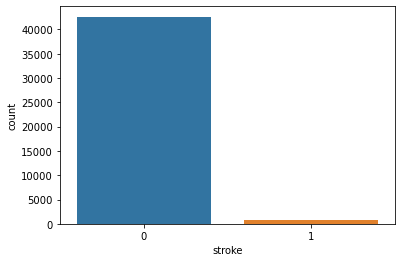

In [13]:
#Displaying countplot to see stroke counts
print(cstroke['stroke'].value_counts())
sns.countplot(cstroke['stroke'])

In [14]:
# Statistical summary
cstroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_status_num
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041,0.781313
std,22.519649,0.291235,0.212733,43.111751,7.638023,0.133103,0.687946
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,28.100000,0.000000,1.000000
75%,60.000000,0.000000,0.000000,112.070000,32.600000,0.000000,1.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000,2.000000


### Checking for PDF's

<AxesSubplot:ylabel='Density'>

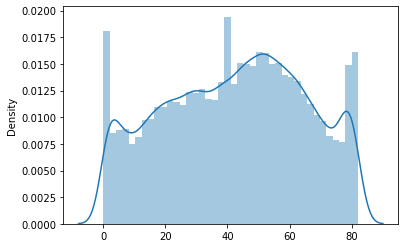

In [15]:
sns.distplot(x=cstroke['age'])

<AxesSubplot:ylabel='Density'>

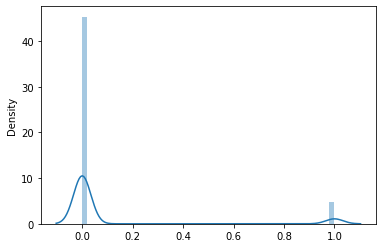

In [16]:
sns.distplot(x=cstroke['hypertension'])

<AxesSubplot:ylabel='Density'>

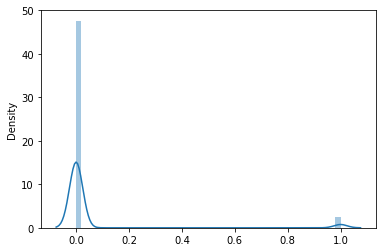

In [17]:
sns.distplot(x=cstroke['heart_disease'])

<AxesSubplot:ylabel='Density'>

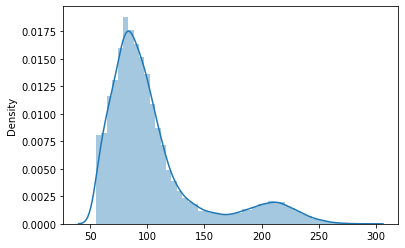

In [18]:
sns.distplot(x=cstroke['avg_glucose_level'])

<AxesSubplot:ylabel='Density'>

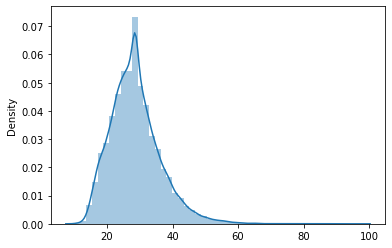

In [19]:
sns.distplot(x=cstroke['bmi'])

<AxesSubplot:ylabel='Density'>

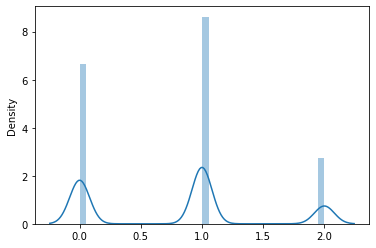

In [20]:
sns.distplot(x=cstroke['smoking_status_num'])

In [21]:
# As per all Pdf's there are not biased columns so all the columns are probably distributed

### Checking for Multicollinearity

In [22]:
#Here we are using variance inflation factor to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cstroke[['age','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status_num']]
vif = pd.DataFrame()
vif['VIF'] =[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])] 
vif['features'] = variables.columns

In [23]:
vif

,VIF,features
0,5.810447,age
1,1.192399,hypertension
2,1.131901,heart_disease
3,6.404059,avg_glucose_level
4,8.997642,bmi
5,2.110277,smoking_status_num


In [24]:
#this is a correlation matrix
corr_matrix = cstroke.corr()
corr_matrix['stroke'].sort_values(ascending=False)

stroke                1.000000
age                   0.156049
heart_disease         0.113763
avg_glucose_level     0.078917
hypertension          0.075332
bmi                   0.018407
smoking_status_num    0.005091
Name: stroke, dtype: float64

In [25]:
#Declaring input and target variable for further analysis
inputx = cstroke.drop(columns=['stroke'])
target = cstroke['stroke']

### Statistical summary

In [26]:
# Here we are using Logistic Regression
import statsmodels.api as sm
inputxx = sm.add_constant(inputx)
log = sm.Logit(target,inputxx)
results=log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.074301
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                43400
Model:                          Logit   Df Residuals:                    43393
Method:                           MLE   Df Model:                            6
Date:                Tue, 24 Oct 2023   Pseudo R-squ.:                  0.1773
Time:                        11:20:33   Log-Likelihood:                -3224.6
converged:                       True   LL-Null:                       -3919.7
Covariance Type:            nonrobust   LLR p-value:                3.350e-297
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.4027      0.283    -29.642      0.000      -8.958      -7.847
age                    0.0701      0.003     24.256      0.000       0.064       0.076
hypertension           0.3168      0.087      3.625      0.000       0.146       0.488
heart_disease          0.6276      0.094      6.704      0.000       0.444       0.811
avg_glucose_level      0.0038      0.001      5.772      0.000       0.002       0.005
bmi                   -0.0089      0.006     -1.460      0.144      -0.021       0.003
smoking_status_num     0.1105      0.054      2.061      0.039       0.005       0.216
======================================================================================
"""

## Model Building

In [27]:
# Here we are importing standard scaler which is very useful as it removes the mean and scales each feature to unit 
#variance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
#Fitting inputs to standard scaler
inputs_scaled = scaler.fit(inputx)

In [29]:
inputs_scaled=inputs_scaled.transform(inputx)

In [30]:
#Here we are importing train test split to split our dataset into training set and testing set
from sklearn.model_selection import train_test_split

In [31]:
X_train,x_test,Y_train,y_test = train_test_split(inputs_scaled,target,test_size=0.2,random_state=53)

In [32]:
# Importing Logistic regression for prediction
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [34]:
y_pred=model.predict(x_test)

In [35]:
#Importing accuracy_score function and confusion matrix from sklearn.metrics package
from sklearn.metrics import accuracy_score,confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Creating a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(conf_mat, columns=['Predicted Negative', 'Predicted Positive'], 
                            index=['Actual Negative', 'Actual Positive'])

print(confusion_df)

                 Predicted Negative  Predicted Positive
Actual Negative                8531                   0
Actual Positive                 149                   0


In [36]:
#Here we are calculating acuracy_score, sensitivity, specificity
accuracy = accuracy_score(y_test, y_pred)
accuracy_score = (accuracy*100).round(2)
true_negatives = conf_mat[0, 0]
false_positives = conf_mat[0, 1]
false_negatives = conf_mat[1, 0]
true_positives = conf_mat[1, 1]

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

In [37]:
print(f"Accuracy:{accuracy_score}")
print(f"Sensitivity : {sensitivity}")
print(f"Specificity: {specificity}")

Accuracy:98.28
Sensitivity : 0.0
Specificity: 1.0


## Questions
### 1.What are the main factors that contribute to stroke occurrence in the dataset?
### 2.Can we effectively identify individuals at risk of experiencing cerebral strokes based on their attributes?
### 3.How well does the model perform in detecting stroke occurrence while considering the class imbalance?
### 4.How can healthcare providers use the model's predictions to improve patient care and reduce the risk of strokes?


## Answers
### 1. Age, Glucose level, BMI are major factors that contribute to stroke occurence in the dataset. Also hypertension and heart disease are correlated but not too much.
### 2. Yes we can effectively identify strokes based on their attributes as model giving 98% accuracy.
### 3. Model perform very well in detecting stroke with 98% accuracy.
### 4. As model is our highly effective they can immediately encounter patient having strokes and can start treatments. This will reduce more risks.